# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/warcoder/dog-breeds-details

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

dogs_df = pd.read_csv("dog_breedscopy.csv")

dogs_df.info()
dogs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  97 non-null     object 
 1   min_life_expectancy   97 non-null     int64  
 2   max_life_expectancy   97 non-null     int64  
 3   max_height_male       97 non-null     float64
 4   max_height_female     97 non-null     float64
 5   max_weight_male       97 non-null     float64
 6   max_weight_female     97 non-null     float64
 7   min_height_male       97 non-null     float64
 8   min_height_female     97 non-null     float64
 9   min_weight_male       97 non-null     float64
 10  min_weight_female     97 non-null     float64
 11  good_with_children    97 non-null     int64  
 12  good_with_other_dogs  97 non-null     int64  
 13  shedding              97 non-null     int64  
 14  grooming              97 non-null     int64  
 15  drooling              97 

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
0,Golden Retriever,10,12,24.0,24.0,75.0,65.0,23.0,23.0,65.0,...,4,2,2,1,5,4,3,5,3,1
1,Dachshund,12,16,9.0,9.0,32.0,32.0,8.0,8.0,16.0,...,2,2,2,2,4,4,4,4,3,5
2,Labrador Retriever,10,12,24.5,24.5,80.0,70.0,22.5,22.5,65.0,...,4,2,2,1,5,5,3,5,5,3
3,Great Dane,7,10,32.0,32.0,175.0,140.0,30.0,30.0,140.0,...,3,1,4,1,3,4,5,3,4,3
4,Boxer,10,12,25.0,25.0,80.0,65.0,23.0,23.0,65.0,...,2,2,3,1,4,4,4,4,4,3


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

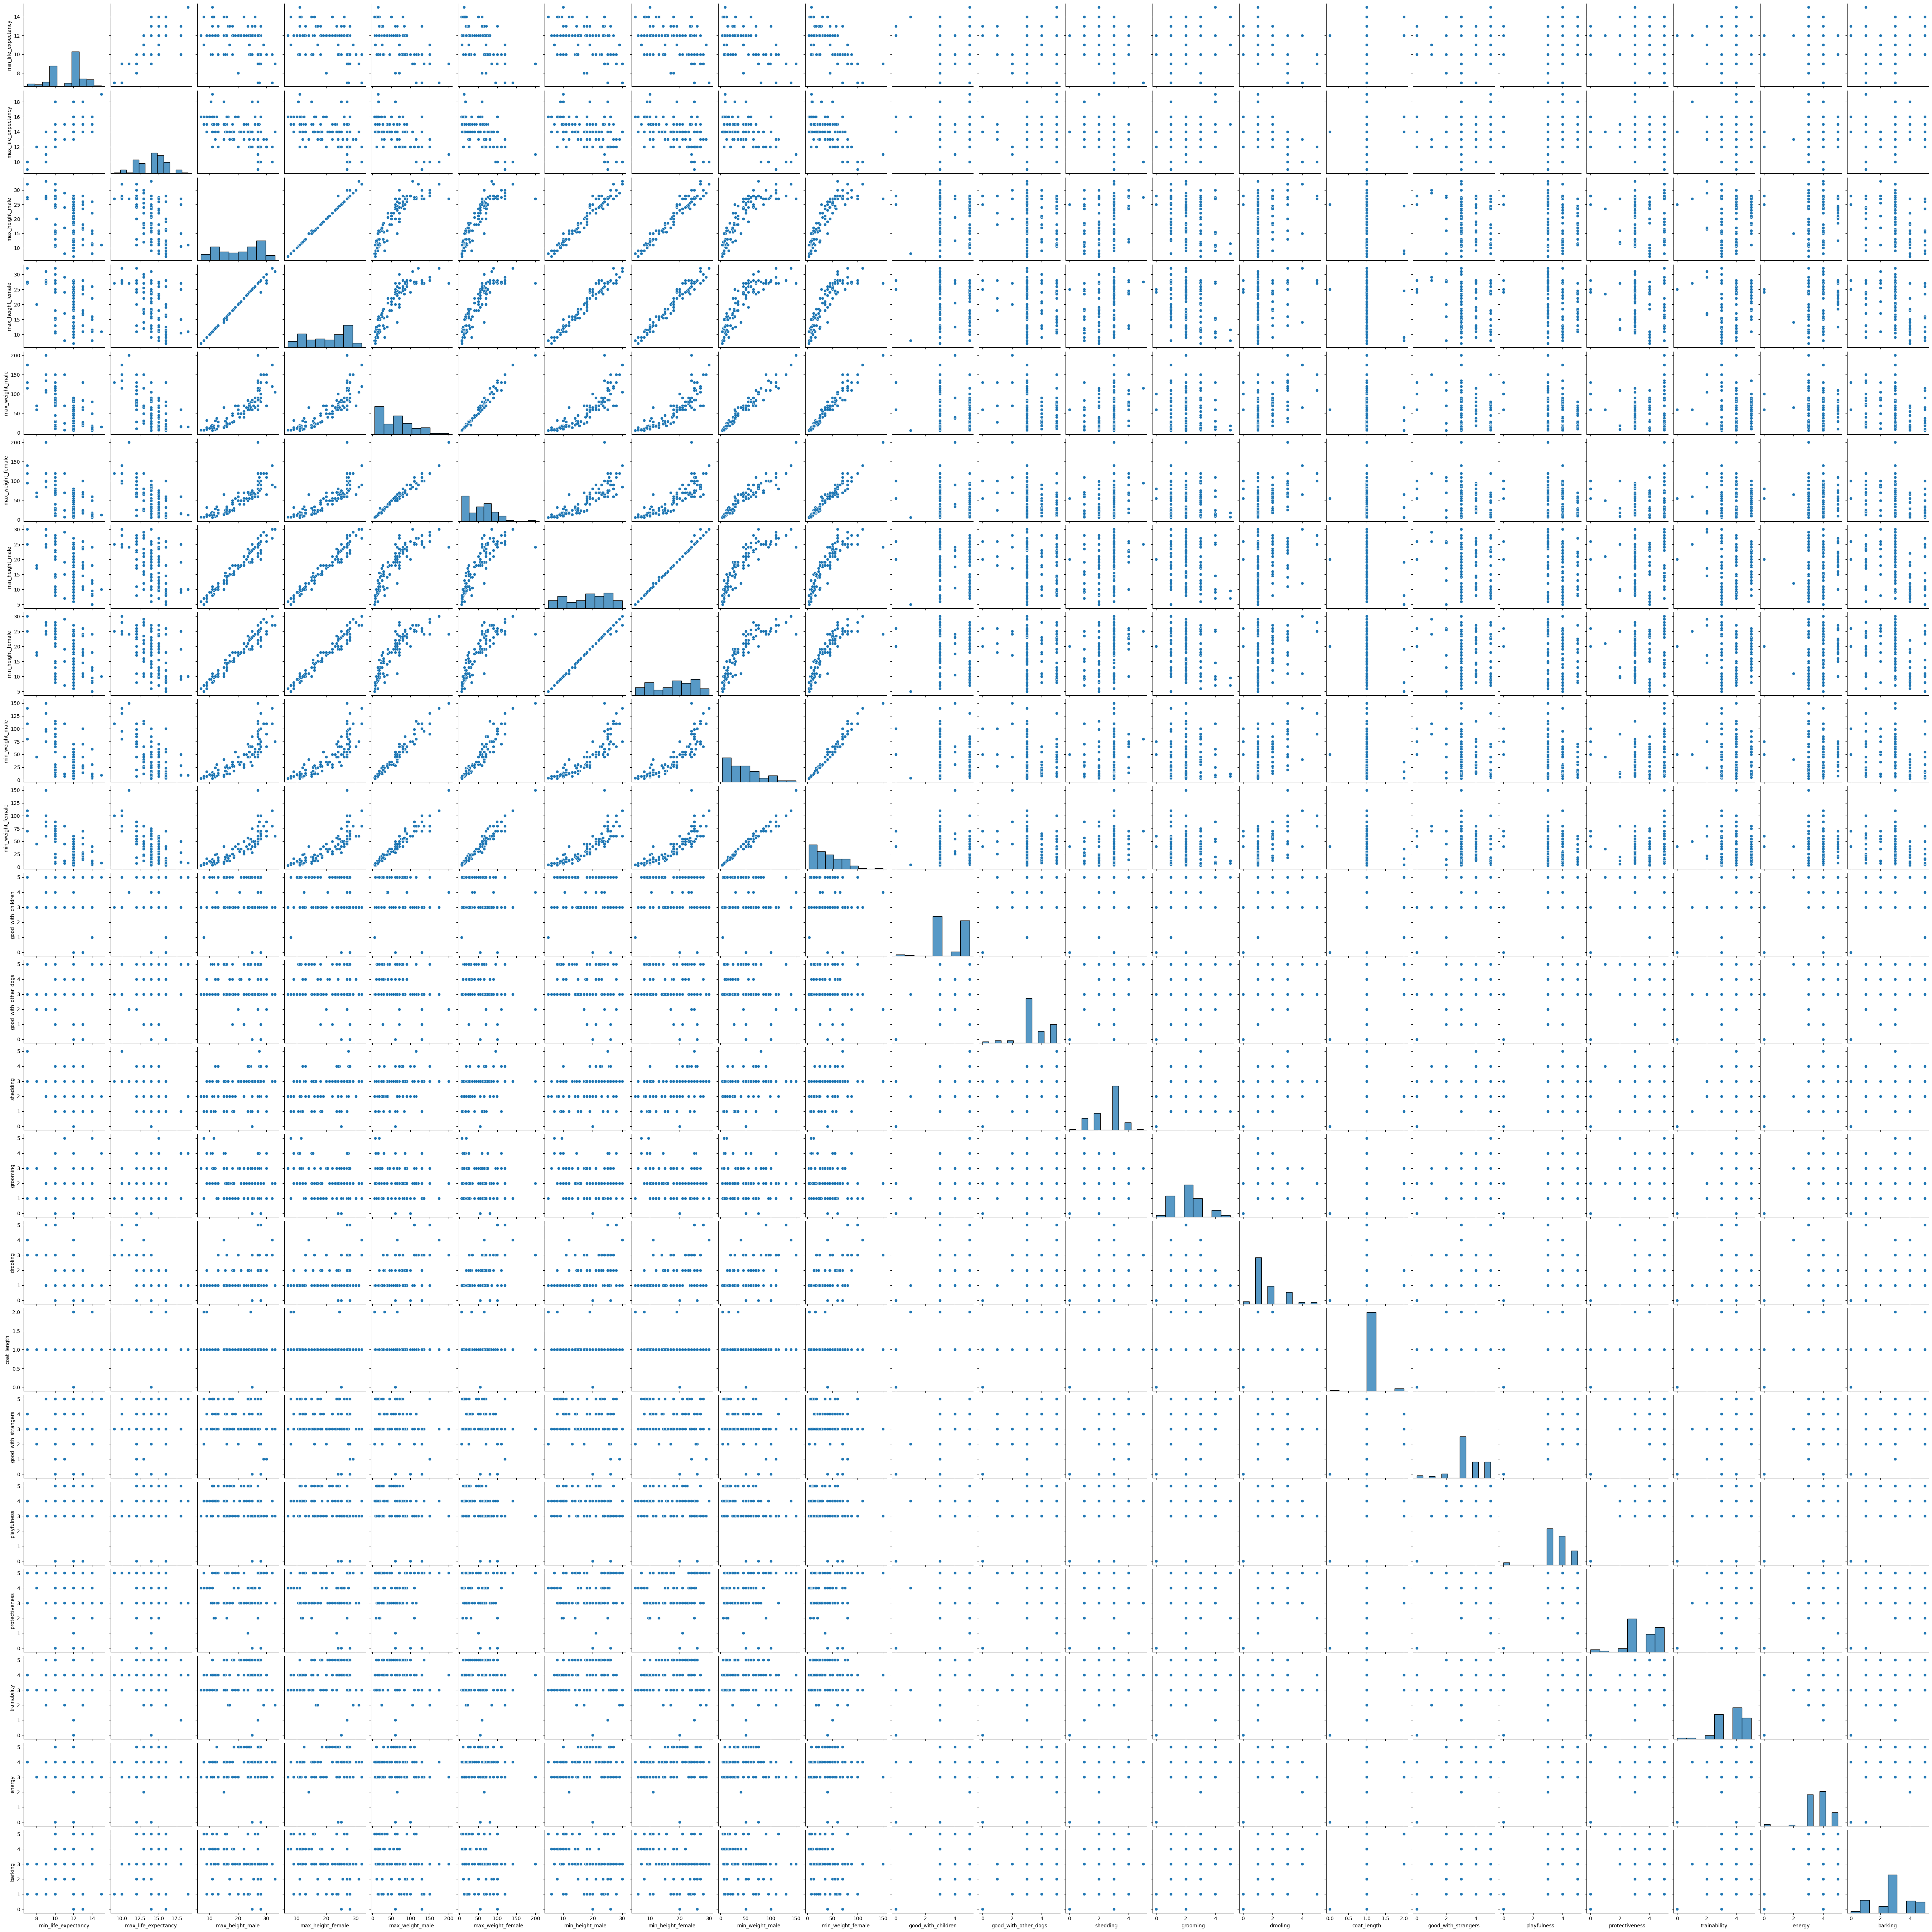

None


In [8]:
sns.pairplot(dogs_df)
plt.show()

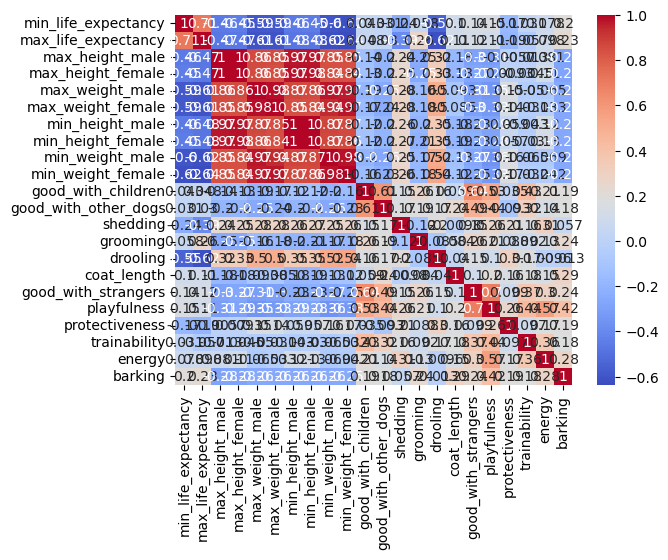

In [9]:
sns.heatmap(dogs_df.corr(), cmap="coolwarm", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [18]:
X = dogs_df['max_height_male'] 
Y = dogs_df['max_height_female']

In [19]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train
Y_train

21    22.0
63    23.5
33    28.0
89    12.5
72    18.5
      ... 
79    21.0
87    25.0
67    27.0
24    28.0
8     15.0
Name: max_height_female, Length: 67, dtype: float64

In [20]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      max_height_female   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.332e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.59e-93
Time:                        19:18:53   Log-Likelihood:                -6.1928
No. Observations:                  67   AIC:                             16.39
Df Residuals:                      65   BIC:                             20.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0916      0.102      0.902      0.370      -0.111       0.294
max_height_male     0.9932      0.005    208.133      0.000       0.984       1.003
==============================================================================
Omnibus:                      120.394   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4104.077
Skew:                          -5.946   Prob(JB):                         0.00
Kurtosis:                      39.451   Cond. No.                         65.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

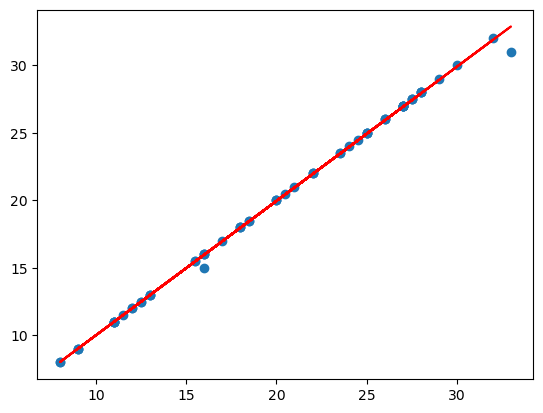

In [22]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 0.0916 + 0.9932*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


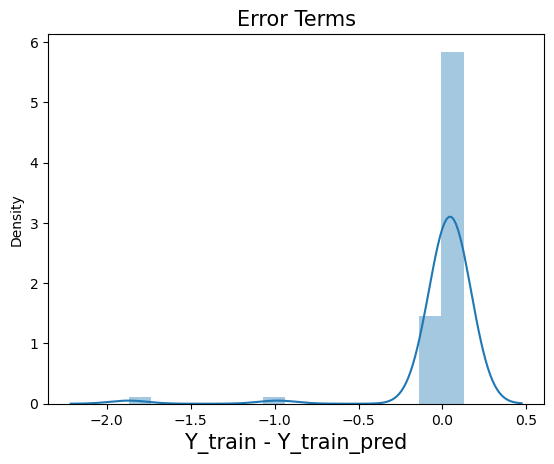

In [24]:
# Error = Actual y value - y predicted value

# Predicting y_value using train data of X
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - Y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

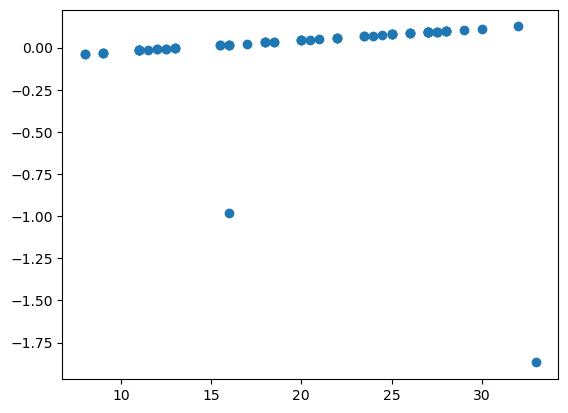

In [25]:
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.999
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was significantly valuable.
3. Was your plot of the error terms a bell curve? in one area it is, but not necessarily.